## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_results_merge = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
data_results_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [190]:
# Checking the number of mice.
Mice_count = data_results_merge["Mouse ID"].nunique()
Mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_mice = data_results_merge.groupby("Mouse ID")["Timepoint"].nunique()

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [211]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mice_data = data_results_merge.drop_duplicates(subset="Mouse ID", keep='last', inplace=False, ignore_index=False)
Mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [5]:
# Checking the number of mice in the clean DataFrame.
Mice_data["Mouse ID"].nunique()

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Regimen_volume = Mice_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"]
Tumor_mean = Regimen_volume.mean()
Tumor_mean = round(Tumor_mean,2)
Tumor_median = Regimen_volume.median()
Tumor_median = round(Tumor_median,2)
Tumor_variance = Regimen_volume.var()
Tumor_variance = round(Tumor_variance,2)
Tumor_std = Regimen_volume.std()
Tumor_std = round(Tumor_std,2)
Tumor_sem = Regimen_volume.sem() 
Tumor_sem = round(Tumor_sem,2)

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
Summary_Statistics = pd.DataFrame({'Mean of Tumor Volume':Tumor_mean, 'Median of Tumor Volume':Tumor_median,'Variance of Tumor Volume':Tumor_variance,'STD. Deviation of Tumor Volume':Tumor_std,'SEM of Tumor Volume': Tumor_sem})
Summary_Statistics

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD. Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar and Pie Charts

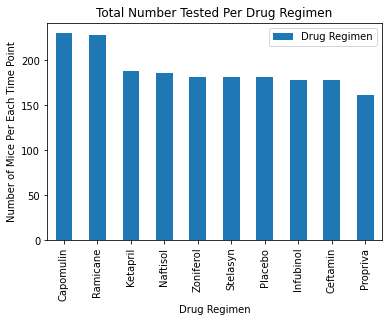

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Mice_per_time = pd.DataFrame(pd.value_counts(data_results_merge["Drug Regimen"]))
Mice_per_time.plot(kind = "bar")
plt.title("Total Number Tested Per Drug Regimen")
plt.ylabel("Number of Mice Per Each Time Point")
plt.xlabel("Drug Regimen")
plt.show()


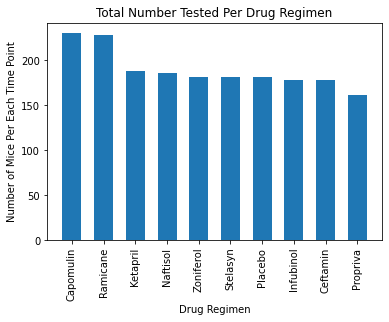

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = data_results_merge["Drug Regimen"].value_counts().index
y_axis = data_results_merge["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis, width = 0.6)
plt.xticks(x_axis, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Per Each Time Point")
plt.title("Total Number Tested Per Drug Regimen")
plt.show()


array([<AxesSubplot:ylabel='Sex'>], dtype=object)

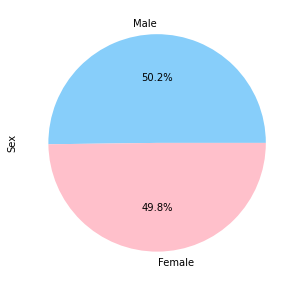

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mice_gender = pd.value_counts(Mice_data['Sex'])
Mice_gender.plot(kind = "pie", subplots=True, figsize=(5,5), y="sex", autopct="%1.1f%%", colors = ["lightskyblue", "pink"] )

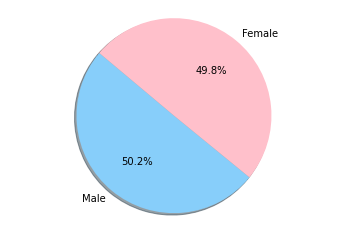

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [125, 124]
colors = ["lightskyblue","pink"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [266]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
List_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Timepoint_greatest = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
Timepoint_greatest = Timepoint_greatest.stack(level=0).unstack(level=0)

In [268]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

Drug_treatment = 0
for drug in List_treatment:
    quartiles = Timepoint_greatest[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if Drug_treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    Drug_treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

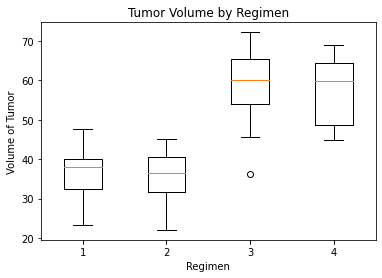

In [269]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []
for drug in List_treatment:
    boxplot_list.append(list(Timepoint_greatest[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list)
plt.ylabel("Volume of Tumor")
plt.title("Tumor Volume by Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

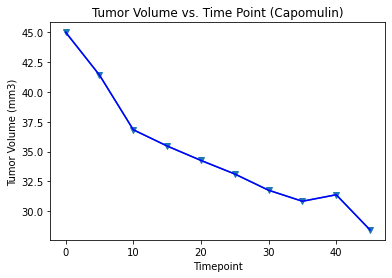

In [282]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m601_mouse = data_results_merge.loc[data_results_merge['Mouse ID'] == 'm601']
plt.plot(m601_mouse['Timepoint'], m601_mouse['Tumor Volume (mm3)'], marker = 'v')
plt.plot(x, y, color="blue",label="Mouse ID s185")
plt.title("Tumor Volume vs. Time Point (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

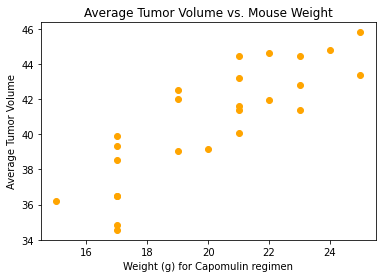

In [314]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_regimen = data_results_merge.loc[data_results_merge['Drug Regimen'] == 'Capomulin']
Average_volume = pd.DataFrame(Capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
Average_volume = pd.merge(Capomulin_regimen, Average_volume, on='Mouse ID')
Capomulin_final = Average_volume[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()
plt.scatter(Capomulin_final['Weight (g)'],Capomulin_final['Tumor Volume (mm3)_y'], color="orange")
plt.xlabel("Weight (g) for Capomulin regimen")
plt.ylabel("Average Tumor Volume")
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.show()

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

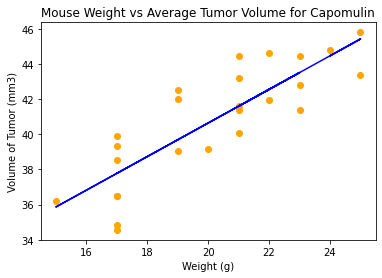

In [336]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Correlation_model = st.pearsonr(Capomulin_final['Weight (g)'],Capomulin_final['Tumor Volume (mm3)_y'])
Correlation_model = round(Correlation_model[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capomulin_final['Weight (g)'], Capomulin_final['Tumor Volume (mm3)_y'])
Regression_values=Capomulin_final["Weight (g)"]* slope + intercept
plt.scatter(Capomulin_final['Weight (g)'],Capomulin_final['Tumor Volume (mm3)_y'], color="orange")
plt.plot(Capomulin_final['Weight (g)'], Regression_values, color='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Volume of Tumor (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.show
